# Project: Investigate a Dataset:  Medical appointmentsin Brazil!

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>

<ul>
            <li><a href="#ScheduledDay">ScheduledDay</a></li>
            <li><a href="#AppointmentDay">AppointmentDay</a></li>
            <li><a href="#patientId">patientId</a></li>
            <li><a href="#AppointmentID">AppointmentId</a></li>
            <li><a href="#gender">Gender</a></li>
            <li><a href="#Age">Age</a></li>
            <li><a href="#neighbourhood">Neighbourhood</a></li>
            <li><a href="#SMS_received">SMS_received</a></li>
            <li><a href="#handicap">handicap</a></li>
            <li><a href="#no_show">no_show</a></li>
            <li><a href="#Hipertension">Hipertension</a></li>
            <li><a href="#Scholarship">Scholarship</a></li>
            <li><a href="#Diabetes">Diabetes</a></li>
            <li><a href="#Alcoholism">Alcoholism</a></li>
        
 </ul>
 <li><a href="#plots">Plots</a></li>
 <li><a href="#Machine_Learning">Machine Learning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
- ’patientId*’ ID of the patient.
- ’AppointmentId’ ID of the appointment.
- ’Gender’: This column says if the person is Male (M) or Female (F).
- ’ScheduledDay’: This column is the date and time of when the appointment is made.
- ’AppointmentDay’ This column is the date and time of when the appointment occured.
- ’Age’ Age of the patient.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- ’Hipertension’ This column indicates weather the patient had a hipertension.
- ’Diabetes’ This colum indicates if the patient has diabetes.
- ’Alcoholism’ This colum indicates if the patient suffers from alcoholism.
- ’Handcap’ If the patient has a handicap, categorized from 0-4.
- ’SMS_received’ If the patient received an SMS before the appointment or not.
- ’No-show’ If the patient did not show up to the appointment. - Be careful about the encoding: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

## Questions to be explored

What factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?


In [53]:
#import necessary modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
from sklearn import preprocessing


<a id='wrangling'></a>
## Data Wrangling





In [54]:
df = pd.read_csv("data/noshowappointments-kagglev2-may-2016.csv", dtype = {"PatientId": str, "AppointmentID": str})

In [55]:
#checking for missing data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [56]:
#how big is the dataset
df.shape

(110527, 14)

In [57]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [58]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2572134369293,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,377511518121127,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [59]:
#check out columnAppointmentDay
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  object
 1   AppointmentID   110527 non-null  object
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(7), object(7)
memory usage: 11.8+ MB


In [60]:
#get booleans into No-show column for easier handling
no_show = {
"No": 0,
"Yes": 1}

df["No-show"] = df["No-show"].map(no_show)

<a id='ScheduledDay'></a>
#### *ScheduledDay*

*ScheduledDay*: This column is the date and time of when the appointment is made.

The dtype of the column *ScheduledDay* is an  object (dtype=object). Let us convert them into datetime so we can work with them more easily.  

We will create new columns: 
> ** *AppointmentDay_date* **  
Date at which the appointment is made as intege

<div style="text-align: right"> <a href="#top">to top</a> </div>

In [61]:
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  object             
 1   AppointmentID   110527 non-null  object             
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  object             
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [63]:
df["ScheduledDay_date"] = df["ScheduledDay"].apply(lambda x: x.date())

<a id='AppointmentDay'></a>

#### *AppointmentDay*

*AppointmentDay*: This column is the date and time of when the appointment occured.

We will create new columns: 
> ** *ScheduledDay_date* **  
Date at which the appointment occured

In [64]:
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])

Now they are in datetime, great! We can extract attributes like weekday, date & hour. Lets extracte the date.

In [65]:
df["AppointmentDay_date"] = df["AppointmentDay"].apply(lambda x: x.date())


let us check if we have the hours for the AppointmentDay. 

In [66]:
df["AppointmentDay"].apply(lambda x: x.hour).unique()


array([0], dtype=int64)

It only shows an array of 0. That means, we do not have the hours. 

Create a column called lead_days

> ** *lead_days* **  
difference between AppointmentDay_date & ScheduledDay_date


<div style="text-align: right"> <a href="#top">to top</a> </div>

lead_days
Since we don't have the time for the appointment, we'll just compute the difference in days between the scheduled_day and appointment_day, assuming all scheduling is done at 00:00:00.



In [67]:
df["lead_days"] = df["AppointmentDay_date"]- df["ScheduledDay_date"]


In [68]:
df["lead_days"].head()

0   0 days
1   0 days
2   0 days
3   0 days
4   0 days
Name: lead_days, dtype: timedelta64[ns]

Since it is a bit annoying to filter with dtype: timedelta64[ns], let us convert the columns into an integer

In [69]:
df["lead_days"] = df["lead_days"].astype('timedelta64[D]').astype(int)

As such, same-day appointments should show a 0. Any value < 0 means there may be something wrong with the data as it doens't make sense for the appointment to happen before the scheduling. Let us drop these.

In [70]:
print(df.shape)
print(df.loc[~df["lead_days"] < 0].shape)
df = df.loc[~df["lead_days"] < 0]

(110527, 17)
(110522, 17)


Let us look at the distribution of lead days

<AxesSubplot:>

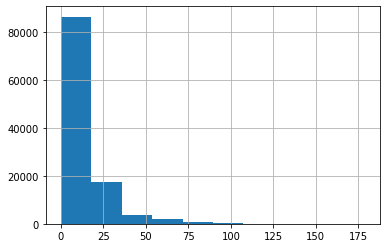

In [71]:
df["lead_days"].hist()


Appointments start to get sparse as lead_days increases. To avoid the problem of some lead_day values having very few samples, or even none, we bin lead_days into categories. The bins are not uniform, because as we shall see, same-day appointments are very different from where lead_days is 1 or 2, which, in turn, are different from the rest in some important aspects.


Create a column called appointment_DOW

> ** *appointment_DOW* **  
day of the week of appointment day. Mondays are 0 and Sundays are 6.


<div style="text-align: right"> <a href="#top">to top</a> </div>

In [72]:
# Create the appointment day-of-week column
df['appointment_DOW'] = df["AppointmentDay"].dt.dayofweek

Create a column called lead_days_category

> ** *lead_days_category* **  
devides lead_days into different categories


<div style="text-align: right"> <a href="#top">to top</a> </div>

In [73]:
# Create lead_days_category column
lead_days_labels = pd.Series([
    'A: Same day',
    'B: 1-2 days',
    'C: 3-7 days',
    'D: 8-31 days',
    'E: 32+ days'
    ])
df['lead_days_category'] = pd.cut(
    df["lead_days"], bins = [-1, 0, 2, 7, 31, 999],
    labels = lead_days_labels,
    )

In [74]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_date,AppointmentDay_date,lead_days,appointment_DOW,lead_days_category
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,2016-04-29,0,4,A: Same day
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0,4,A: Same day
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0,4,A: Same day
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0,4,A: Same day
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,2016-04-29,0,4,A: Same day


<a id='patientId'></a>
#### *patientId*

*patientId*: ID of the patient

 


In [75]:
#how many unique patients are there
len(df["PatientId"].unique())

62299

In [76]:
#which 5 patients had the most appointments?
df.groupby(by= "PatientId").count().sort_values(by = "Handcap", ascending = False)[["Handcap"]].head()

,Handcap
PatientId,
822145925426128,88
99637671331,84
26886125921145,70
33534783483176,65
258424392677,62


<a id='AppointmentID'></a>
#### *AppointmentID*

*AppointmentID*: Unique Appointment ID



In [77]:
print(len(df["AppointmentID"].unique()))
print(df.shape)



110522
(110522, 19)


-> since the lengths corresponds to df.shape, we can say that all IDs are unique

<a id='gender'></a>
#### *gender*

*gender*: gender of patient


In [78]:
df["Gender"].value_counts()
#more females then males!

F    71837
M    38685
Name: Gender, dtype: int64

Create a column called is_female

> ** *is_female* **  
1 = female;
0 = male

In [79]:
df.loc[df["Gender"] == "F", "is_female"] = 1

In [80]:
df["is_female"].fillna(value = 0, inplace= True)

<a id='Age'></a>
#### *Age*

We'll look at the range and the values with the most counts to look for possible errors. 

<div style="text-align: right"> <a href="#top">to top</a> </div>

<AxesSubplot:>

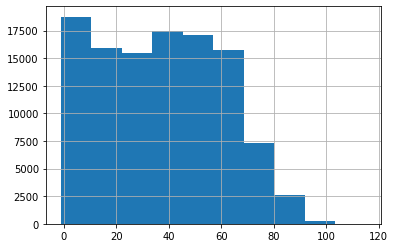

In [81]:
#what is the age distribution
df["Age"].hist()

The age seems to be distributed evenly until ~65. Above 65, the numbers seem to decrease. Seems to also be that there is a negative age somewhere. Let us check

In [82]:
df.loc[df["Age"]<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_date,AppointmentDay_date,lead_days,appointment_DOW,lead_days_category,is_female
99832,465943158731293,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,0,2016-06-06,2016-06-06,0,0,A: Same day,1.0


this does not look corret. Let us discard this value

In [83]:
df = df.loc[~df["Age"]<0]

In [84]:
df.groupby(by = "Age").count().sort_values(by = "PatientId", ascending=False)[["PatientId"]].head(20)

,PatientId
Age,
0,3539
1,2273
52,1746
49,1652
53,1651
56,1635
38,1628
59,1624
2,1618


a lot of kids seem to go the doctor
people below their 30s seem to be healthy on first sight

In order to get the no-show rates by age range, let us do the following

In [85]:
df.loc[:, "Age_Cust"] = pd.cut(df["Age"], bins = [0,13,40,90], labels = ["Childs", "Adults", "Seniors"])

df.groupby(by = "Age_Cust").mean()["No-show"]

Age_Cust
Childs     0.213452
Adults     0.236346
Seniors    0.172286
Name: No-show, dtype: float64

As you can see, people between 13-40 are with the higher no-show rates.

<a id='neighbourhood'></a>
#### *neighbourhood*

According to the provider of the data, this column records the neighbourhood of the hospital in which the appointment is carried out. It is possible for patients to come from outside of the neighbourhood, or even the city. 

<div style="text-align: right"> <a href="#top">to top</a> </div>

In [86]:
#what are the biggest neighbourhoods present in the dataset
df["Neighbourhood"].value_counts().head(5)

JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4430
JARDIM DA PENHA    3877
ITARARÉ            3514
Name: Neighbourhood, dtype: int64

In [87]:
len(df["Neighbourhood"].unique())

81

There are 81 of these neighbourhoods in our data set and all of them are in the city of Vitória, Brazil.

<a id='SMS_received'></a>
#### *SMS_received*

*SMS_received* indicates whether an SMS message was sent to the patient to remind them of the appointment.

<div style="text-align: right"> <a href="#top">to top</a> </div>

<a id='handicap'></a>
#### *handicap*

This column contains a integer ranging from 0 to 4, indicating the number of handicaps the patient is suffering from.

Values 2 to 4 are rare. We'll group all > 0 cases together and create a new column: 
> ** *is_handicapped* **  
An integer column where 1 stands for the presence of any handicap.

<div style="text-align: right"> <a href="#top">to top</a> </div>

looks like there are a few outliers, very few people have handicaps 3 and 4. Let us check.

In [88]:
df["Handcap"].value_counts()

0    108282
1      2040
2       183
3        13
4         3
Name: Handcap, dtype: int64

Let us create a new column simply stating if someone has a handicap or not.

In [89]:
df.loc[df["Handcap"] > 0, "is_handicapped"] = 1
df["is_handicapped"].fillna(value = 0, inplace = True)

<a id='no_show'></a>
#### *no_show*

This column takes string values of either 'Yes' or 'No'. A 'Yes' indicates the patient DID NOT show up for the appointment.

We'll first change it into a booleans for easier access.


<div style="text-align: right"> <a href="#top">to top</a> </div>

In [90]:
df["No-show"].value_counts()


0    88207
1    22314
Name: No-show, dtype: int64

~20% did not show up

<a id='Hipertension'></a>
#### *Hipertension*

This column indicates weather the patient had a hipertension yes or no



<div style="text-align: right"> <a href="#top">to top</a> </div>

<a id='Scholarship'></a>
#### *Scholarship*

This column indicates weather the patient had a Scholarship (aid from the government) yes or no


<div style="text-align: right"> <a href="#top">to top</a> </div>

In [91]:
df.groupby("Scholarship").mean()[["No-show"]]

,No-show
Scholarship,
0,0.198033
1,0.237363


people with Scholarship no-show rate is 24% versus the people without Scholarship is 20%.

<a id='Diabetes'></a>
#### *Diabetes*

This column indicates weather the patient had a Diabetes yes or no


<div style="text-align: right"> <a href="#top">to top</a> </div>

In [92]:
df.groupby("Diabetes").mean()[["No-show"]]

,No-show
Diabetes,
0,0.203591
1,0.180033


people with Diabetes no-show rate is 24% versus the people without Scholarship is 20%.

<a id='Alcoholism'></a>
#### *Alcoholism*

This column indicates weather the patient suffered from alcholism yes or no


<div style="text-align: right"> <a href="#top">to top</a> </div>

<a id='Plots'></a>
#### *Plots*



<div style="text-align: right"> <a href="#top">to top</a> </div>

Lets plot these

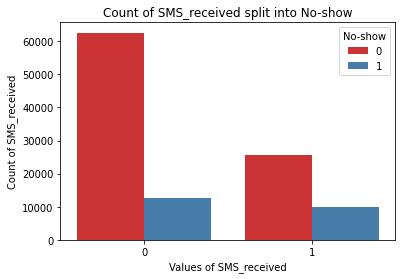

people without SMS_received have a no-show rate of 0.17 versus the people with SMS_received have a no-show rate of 0.28


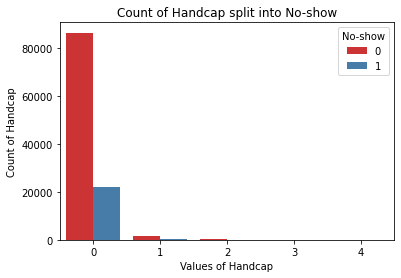

people without Handcap have a no-show rate of 0.2 versus the people with Handcap have a no-show rate of 0.18


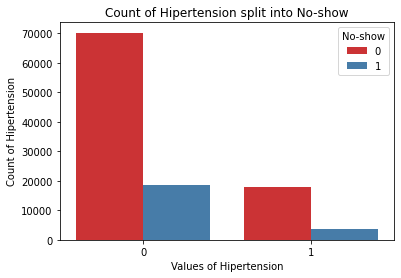

people without Hipertension have a no-show rate of 0.21 versus the people with Hipertension have a no-show rate of 0.17


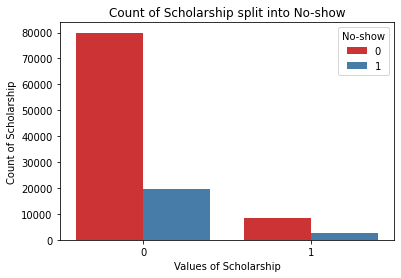

people without Scholarship have a no-show rate of 0.2 versus the people with Scholarship have a no-show rate of 0.24


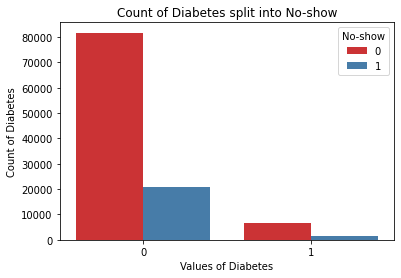

people without Diabetes have a no-show rate of 0.2 versus the people with Diabetes have a no-show rate of 0.18


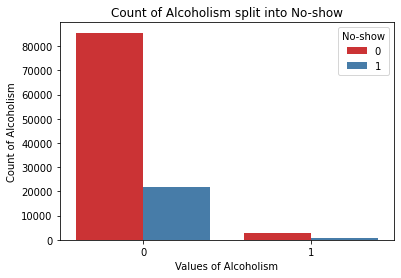

people without Alcoholism have a no-show rate of 0.2 versus the people with Alcoholism have a no-show rate of 0.2


In [93]:
plotted_columns = ["SMS_received", "Handcap", "Hipertension", "Scholarship", "Diabetes","Alcoholism"]

for column in plotted_columns:
    sns.countplot(x=column,hue='No-show',data=df,palette='Set1')

    plt.title("Count of " + column + " split into No-show")
    plt.xlabel("Values of " + column)
    plt.ylabel("Count of " + column)
    plt.show()

    boolean_zero = round(df.groupby(column).mean()["No-show"][0],2)
    boolean_one = round(df.groupby(column).mean()["No-show"][1],2)
    

    print("people without {} have a no-show rate of {} versus the people with {} have a no-show rate of {}" .format(column, boolean_zero, column, boolean_one))

<a id='Machine_Learning'></a>
#### *Machine Learning*

##### Categorical Features

Notice that the **Neighbourhood** column as categorical. That means we need to transform them using dummy variables so sklearn will be able to understand them. 

Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'Neighbourhood'.

In [94]:
#let us discard all other columns but these for the machine learning
df_ml = df[["Age", "Scholarship", "Hipertension", "Neighbourhood", "Diabetes", "Alcoholism", "is_handicapped", "SMS_received", "No-show", "is_female"]]

In [95]:
df_ml = pd.get_dummies(df_ml,columns=["Neighbourhood"],drop_first=True)

In [96]:
df_ml.corr()[["No-show"]]

,No-show
Age,-0.060320
Scholarship,0.029166
Hipertension,-0.035662
Diabetes,-0.015158
Alcoholism,-0.000181
...,...
Neighbourhood_SÃO JOSÉ,0.004906
Neighbourhood_SÃO PEDRO,0.003178
Neighbourhood_TABUAZEIRO,-0.008171
Neighbourhood_UNIVERSITÁRIO,0.000798


In [97]:
#Neighbourhood does have to have a very small correlation to No-show. Lets discard all the neighbourhood columns for now.

In [98]:
df_ml = df[["Age", "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "is_handicapped", "SMS_received", "No-show", "is_female"]]

In [99]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'ScheduledDay_date', 'AppointmentDay_date', 'lead_days',
       'appointment_DOW', 'lead_days_category', 'is_female', 'Age_Cust',
       'is_handicapped'],
      dtype='object')

#### Train Test Split

Now its time to split our data into a training set and a testing set!

In [100]:
from sklearn.model_selection import train_test_split

We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the No-show column.


#### X and y arrays

In [101]:
df_ml.columns

Index(['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism',
       'is_handicapped', 'SMS_received', 'No-show', 'is_female'],
      dtype='object')

In [102]:
X = df_ml[["Age", "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "is_handicapped", "SMS_received", "is_female"]]
y = df_ml['No-show']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#### Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [104]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [105]:
dtree = DecisionTreeClassifier()

In [106]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

#### Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [107]:
predictions = dtree.predict(X_test)

In [108]:
from sklearn.metrics import classification_report,confusion_matrix

In [109]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     26451
           1       0.36      0.02      0.04      6706

    accuracy                           0.79     33157
   macro avg       0.58      0.51      0.46     33157
weighted avg       0.71      0.79      0.71     33157



In [110]:
print(confusion_matrix(y_test,predictions))

[[26228   223]
 [ 6582   124]]


In [111]:
df_ml.corr()[["No-show"]]

,No-show
Age,-0.060320
Scholarship,0.029166
Hipertension,-0.035662
Diabetes,-0.015158
Alcoholism,-0.000181
is_handicapped,-0.007528
SMS_received,0.126502
No-show,1.000000
is_female,0.004132


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What has the biggest influence on not showing up?)

As you can see in df_ml.corr(), the biggest positve correlation hast the column SMS_received. Positive numbers of the correlation matrix indicate a linear correlation. So even though people have received an SMS, they did not show up for the appointment.


### Research Question 2  What data can be discarded, at least for the correlation matrix?

The neighbourhood showed a very low correlation between no-show. Even though it is probably possible to get some insights, they may be discarded for a machine learning model.

In [112]:
def calulate_ratio(df, column_name):
    

    """
    Calculates the ratio of how many people with a boolean column = True & False did not show up to their appointment
    """


    ratio = df.groupby(column_name).mean()["No-show"]
    
    print(ratio)

    return ratio

In [113]:
boolean_columns = ["Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap", "SMS_received"]

In [114]:
for column in boolean_columns:
    calulate_ratio(df, column)

Scholarship
0    0.198033
1    0.237363
Name: No-show, dtype: float64
Hipertension
0    0.208995
1    0.173020
Name: No-show, dtype: float64
Diabetes
0    0.203591
1    0.180033
Name: No-show, dtype: float64
Alcoholism
0    0.201911
1    0.201488
Name: No-show, dtype: float64
Handcap
0    0.202333
1    0.178431
2    0.202186
3    0.230769
4    0.333333
Name: No-show, dtype: float64
SMS_received
0    0.166980
1    0.275745
Name: No-show, dtype: float64


As you can see, the people with Scholarship no-show rate is 24% versus the people without Scholarship is 20%.

<a id='conclusions'></a>
## Conclusions

We have looked at most of the columns in our data set. Some of them show relationships with whether the patient showed up to the appointment, to various degrees, and also between themselves.

*SMS_received*: This will be an important consideration in further studies on the prediction of *no_show*.

*Age*: People between 13-40 have higher no-show rates.

Outliers:

* one person had a negative age, this row was discarded
* Handcap was divided into 4 categories (0-4). As categories 2-4 had very few people, it made sense to create a column is_handicapped only describing if a handicap is present or not
* During 5 appointments, the scheduled day was after the appointment day. This does not make sense. These 5 rows were simply discarded

Overall, the data quality was very good. The number of outliers is neglectable.

Further analysis that could be done is:

* check if on certain week days, appointments were not realised 
* check if there are a number of people who do not show up on a regular basis
* the Decision Tree model did not perform particularly well, further tuning can be done.
